# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head(3)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [7]:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [11]:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [15]:
sensor["date"]=pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods=sensor.shape[0])
sensor.head(3)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02


Assign the time series index to the dataframe's index.

In [21]:
sensor.set_index("date", inplace=True, drop=True)

In [22]:
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [25]:
#!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

/tmp/ipykernel_8315/391548300.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor["userAcceleration.x"], model="additive",freq= 60)


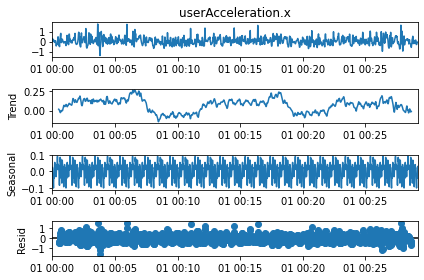

In [28]:
res = seasonal_decompose(sensor["userAcceleration.x"], model="additive",freq= 60)
res.plot();



Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/tmp/ipykernel_8315/2093786469.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res2 = seasonal_decompose(sensor["rotationRate.x"], model="additive",freq= 60)


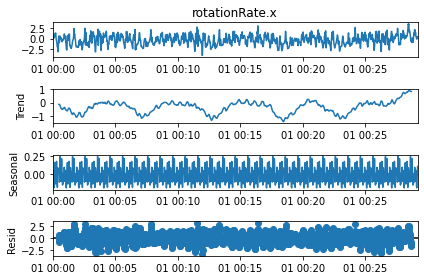

In [29]:
res2 = seasonal_decompose(sensor["rotationRate.x"], model="additive",freq= 60)
res2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

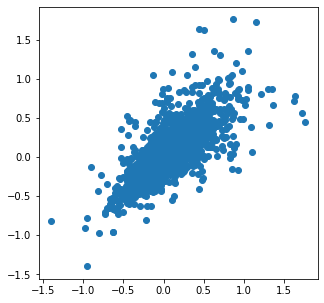

In [50]:
data_t = sensor["userAcceleration.x"][:-1]
data_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(5,5))
plt.scatter(data_t.values, data_t_plus_1)


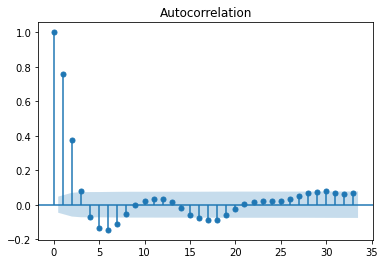

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sensor["userAcceleration.x"]);


Create a lag plot for `rotationRate.x`

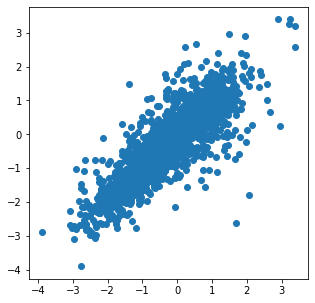

In [52]:
data_t = sensor["rotationRate.x"][:-1]
data_t_plus_1 = sensor["rotationRate.x"][1:]
plt.figure(figsize=(5,5))
plt.scatter(data_t.values, data_t_plus_1)


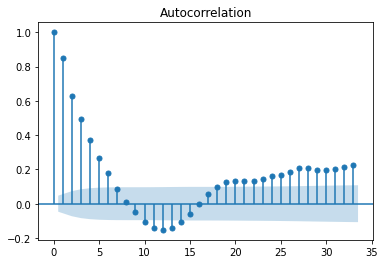

In [41]:
plot_acf(sensor["rotationRate.x"]);

What are your conclusions from both visualizations?

that both loose correlation fast but rotation rate regains correlation after a few periods


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [54]:
from statsmodels.tsa.stattools import adfuller

In [56]:
res = adfuller(sensor["userAcceleration.x"])
res

(-17.95799408616975,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [57]:
adf, pvalue, usedlag, nobs, critical_values, icbest = res
adf

-17.95799408616975

In [55]:
res2 = adfuller(sensor["rotationRate.x"])
res2


(-5.269860625086414,
 6.3202303359123905e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

our data for rotation rate and aceleration is stationary in both cases adf< H_0                          
p_value < 0.05


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
# Your code here:



To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [58]:
from statsmodels.tools import eval_measures

In [16]:
statsmodels.tools.eval_measures.rmse(x1, x2, axis=0)[source]¶